# UoG-DA_Group28 Jupyter Notebook: Regression - Linear Regression (LR)

<hr>

## <u> Initial Setup </u>

Based on our classification evaluation, we have standrized on utilizing a common dataset of `cir_ncir_agg` with a `80:20` split. We will look to import this data and the further subset it into a nlos data frame `nlos_df` and `los_df` to perform Regression to predict the `RANGE` based on the other attributes in the dataset

In [22]:
from utils import *

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load the Datasets
dataset = load_from_pickle("cir_ncir_agg.pkl", "./pickled_data_sets")

nlos_df = dataset[dataset['NLOS'] == 1].copy().reset_index(drop=True)
los_df = dataset[dataset['NLOS'] == 0].copy().reset_index(drop=True)

## <u> Assessing Feature Correlations with RANGE </u>

We will conduct an exploratory analysis to examine the relationship between each individual feature and the target variable: `RANGE`. Using scatter plots, we can look to visualize how each feature varies with RANGE to identify any clear linear trends

### NLOS

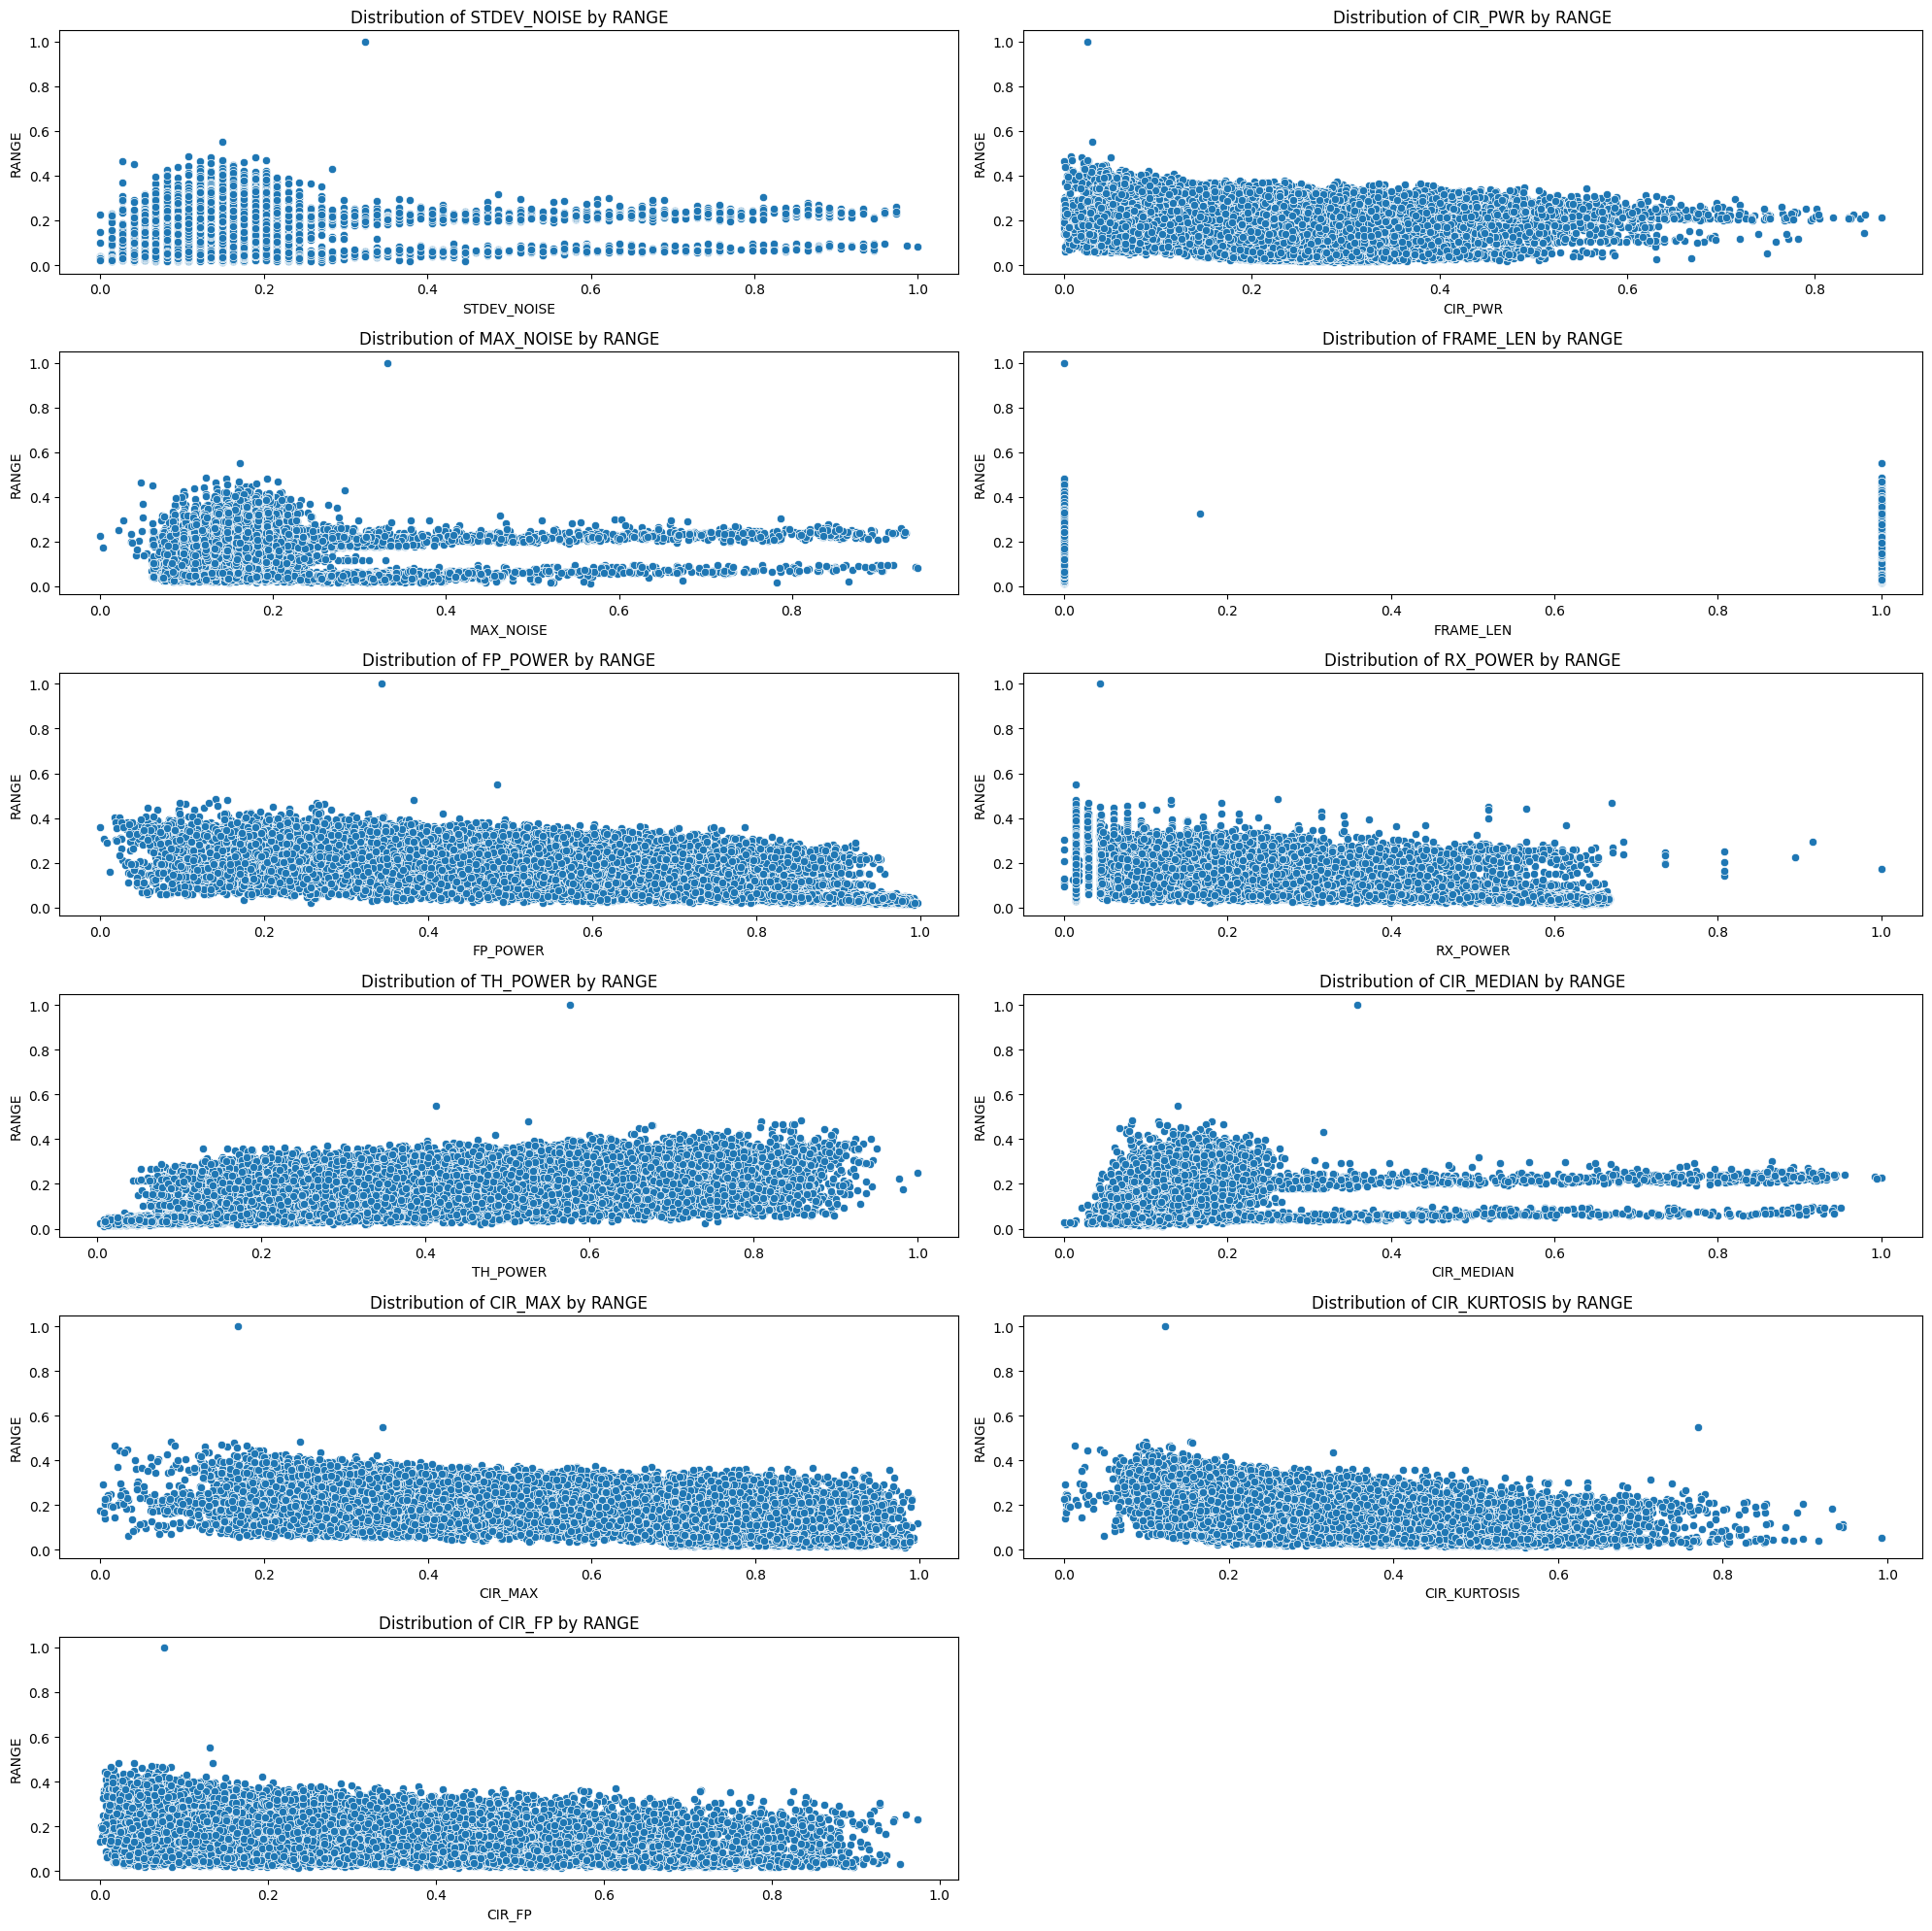

In [23]:
plot_scatter(nlos_df.drop(columns=['NLOS']))

### LOS

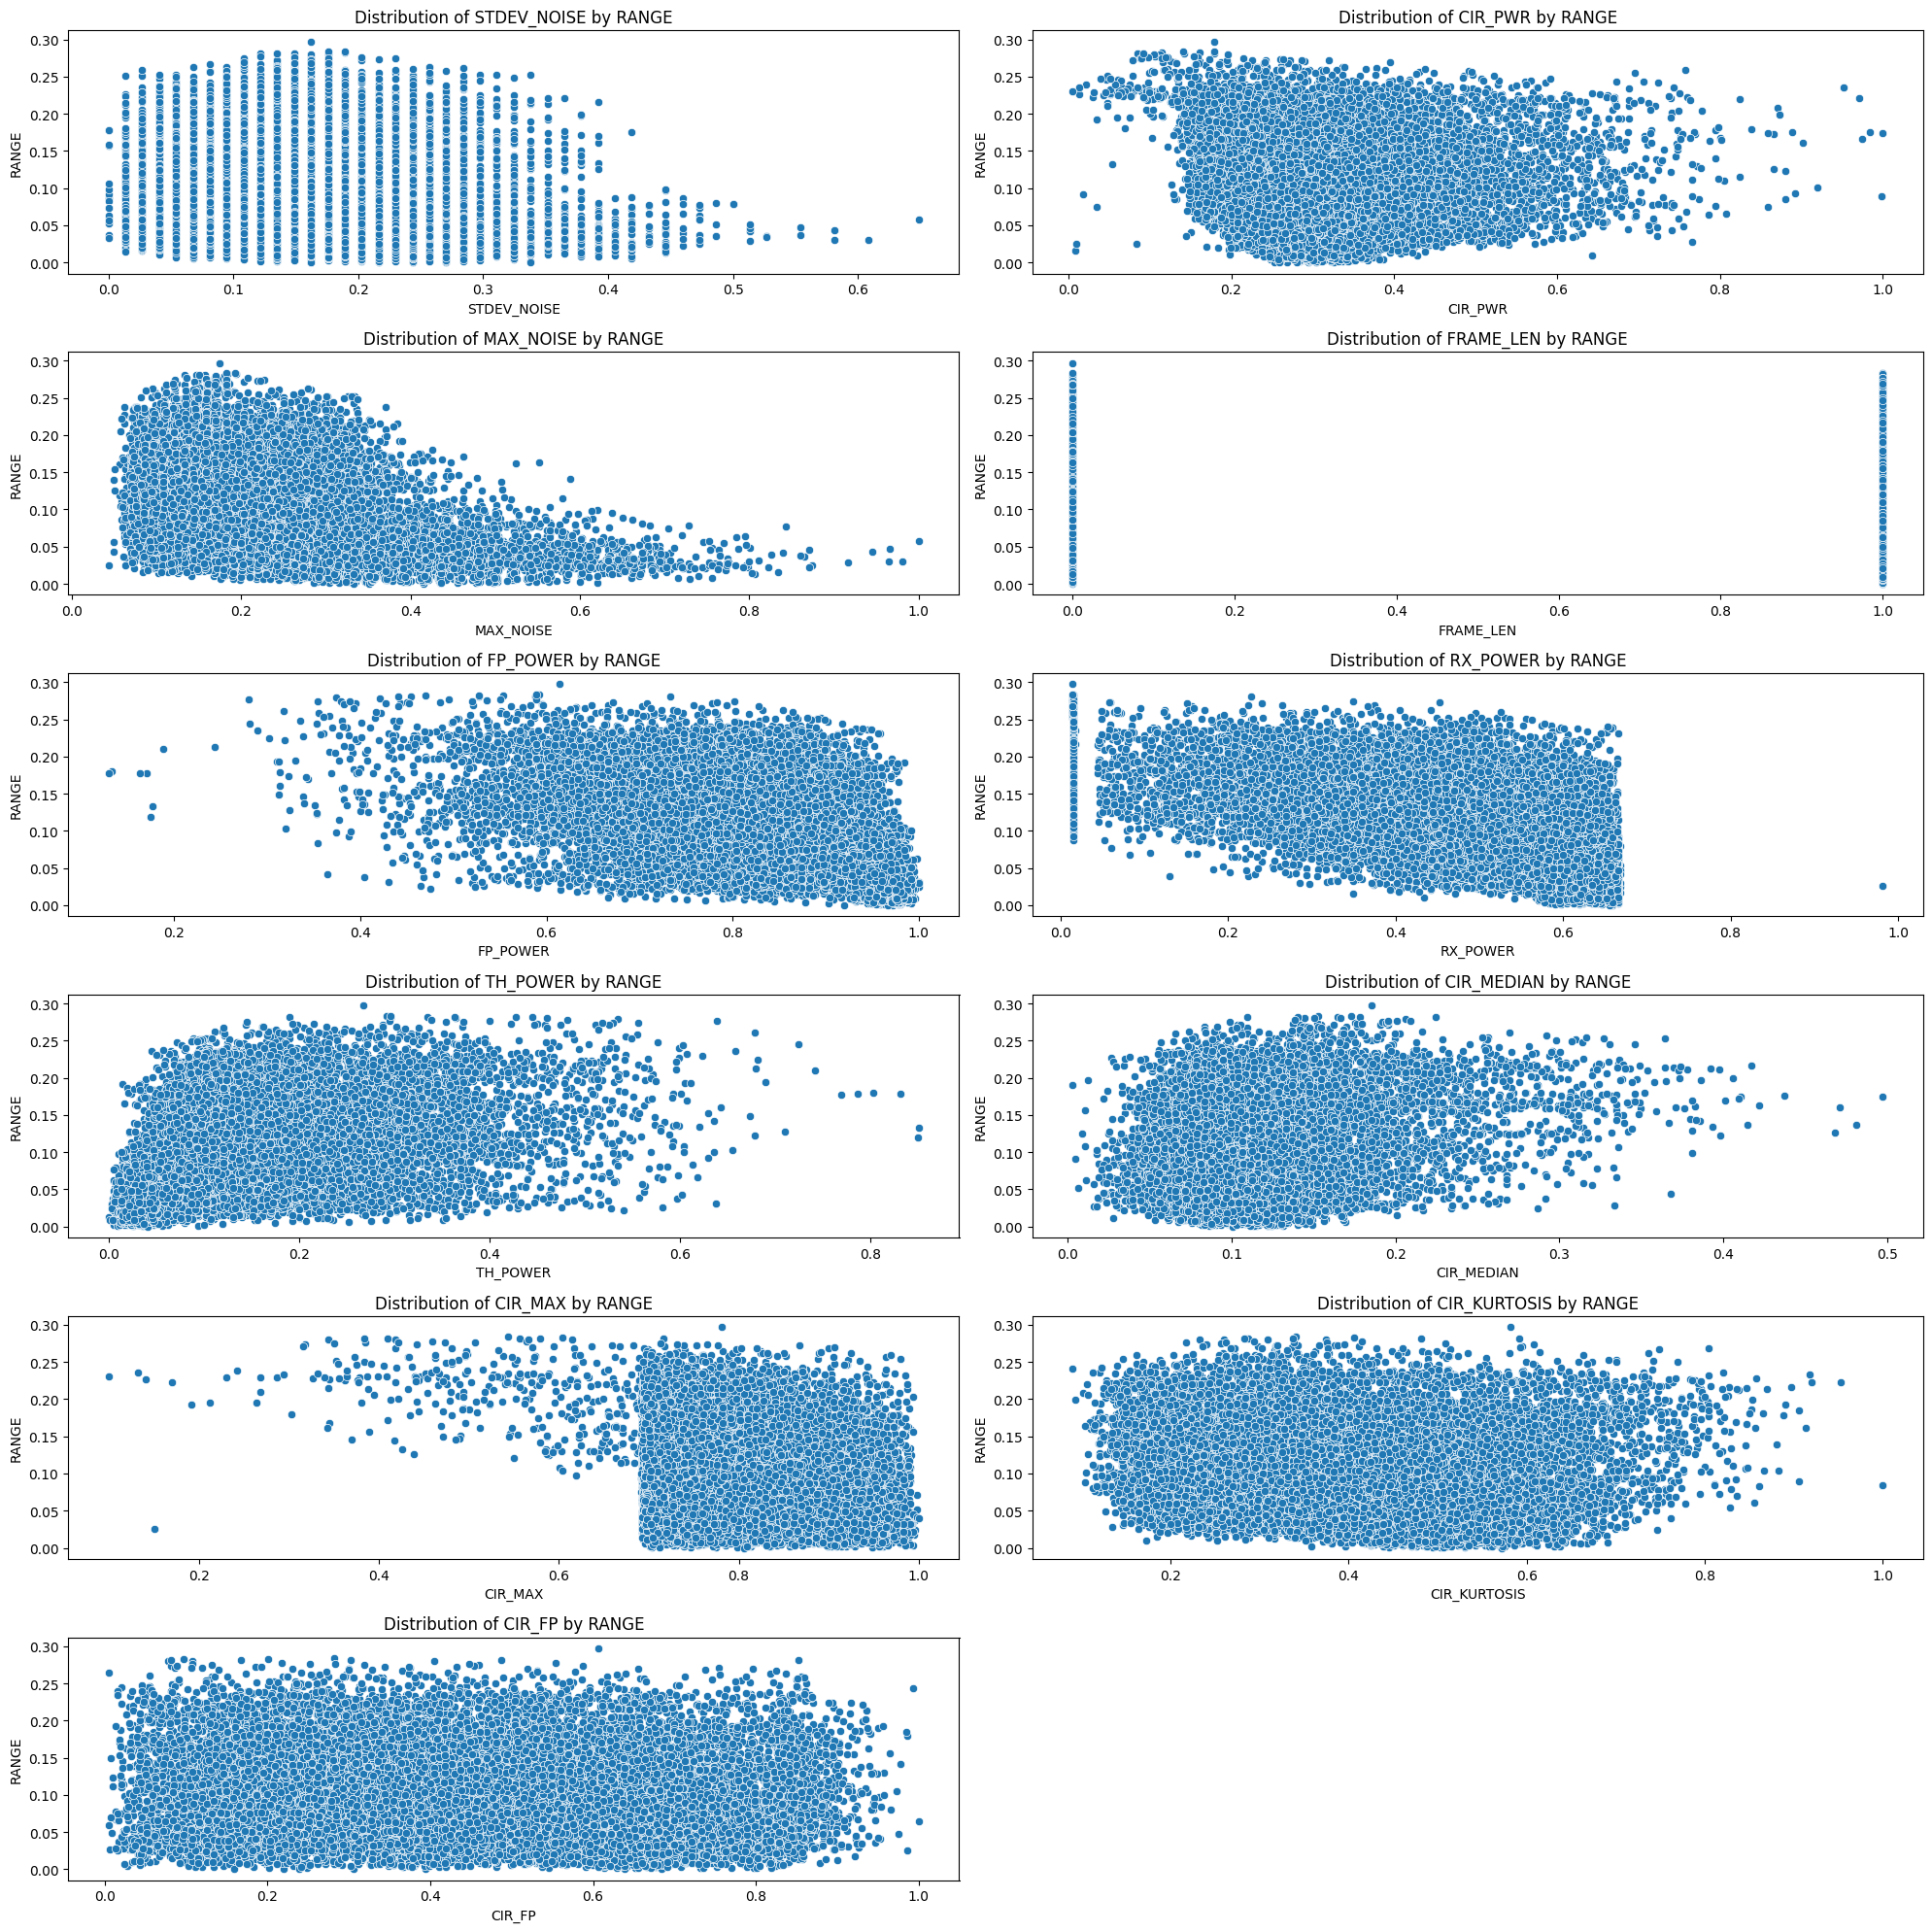

In [24]:
plot_scatter(los_df.drop(columns=['NLOS']))

The analysis revealed that no single feature exhibited a strong linear correlation with `RANGE`. Instead, most features showed weak dispersed patterns. This lack of a distinct one-to-one relationship suggests that the `RANGE` may be influenced by a combination of multiple factors rather than any single variable alone.

## <u> Multiple Linear Regression (MLR) </u>

From out previous analysis, we found that it may be prudent to examine if the `RANGE` may be influenced by a combination of multiple factors, we will look to perform Multiple Linear Regression on the dataframe and examine the results.

### NLOS

In [25]:
# Select the features to be used for Classification
X = nlos_df.drop(columns = ['NLOS','RANGE'] )
Y = nlos_df[['RANGE']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 80:20 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

         Feature  Coefficient
7     CIR_MEDIAN     0.165755
1        CIR_PWR     0.080347
6       TH_POWER     0.048416
0    STDEV_NOISE     0.031658
10        CIR_FP     0.002254
3      FRAME_LEN    -0.017365
5       RX_POWER    -0.028100
4       FP_POWER    -0.050096
8        CIR_MAX    -0.068646
9   CIR_KURTOSIS    -0.110432
2      MAX_NOISE    -0.183182
Intercept: 0.24793666387707097
Mean Absolute Error: 0.05914888744481119
Mean Squared Error: 0.005098502638393065
Root Mean Squared Error: 0.07140379988763249
R² Score: 0.3132960662501414


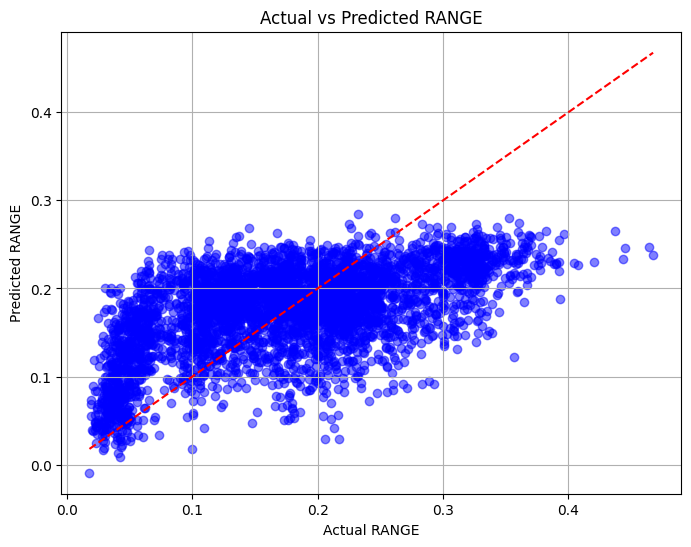

In [26]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

coefficients_df = pd.DataFrame({
    'Feature': X.columns,  # Column names from X (your feature set)
    'Coefficient': model.coef_  # Coefficients from the trained model
}).sort_values(by=['Coefficient'], ascending=False)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(coefficients_df)
print('Intercept:', model.intercept_)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")
# Plot test vs predicted RANGE
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.title('Actual vs Predicted RANGE')
plt.xlabel('Actual RANGE')
plt.ylabel('Predicted RANGE')
plt.grid(True)
plt.show()

### LOS

In [27]:
# Select the features to be used for Classification
X = los_df.drop(columns = ['NLOS','RANGE'] )
Y = los_df[['RANGE']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 80:20 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

         Feature  Coefficient
0    STDEV_NOISE     0.551347
7     CIR_MEDIAN     0.215709
9   CIR_KURTOSIS     0.061267
6       TH_POWER     0.019254
10        CIR_FP     0.010782
3      FRAME_LEN     0.000054
8        CIR_MAX    -0.021628
4       FP_POWER    -0.037084
5       RX_POWER    -0.084951
1        CIR_PWR    -0.133736
2      MAX_NOISE    -0.445886
Intercept: 0.20375952514603735
Mean Absolute Error: 0.03002504497811246
Mean Squared Error: 0.00146207751682053
Root Mean Squared Error: 0.03823712223508106
R² Score: 0.5834057805465663


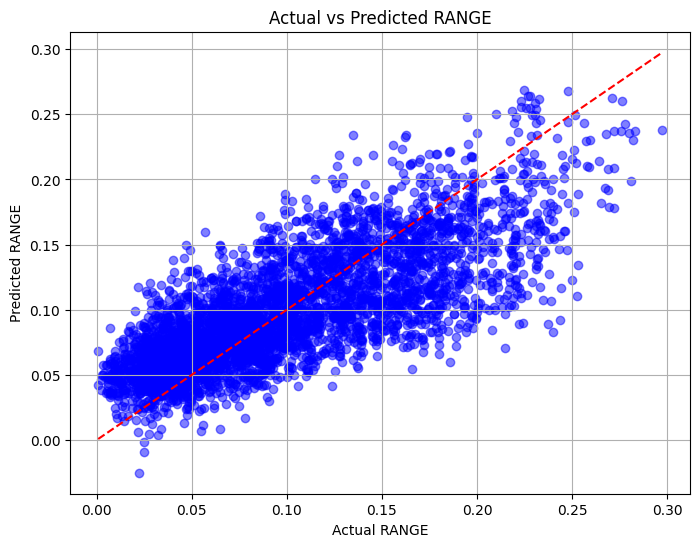

In [28]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

coefficients_df = pd.DataFrame({
    'Feature': X.columns,  # Column names from X (your feature set)
    'Coefficient': model.coef_  # Coefficients from the trained model
}).sort_values(by=['Coefficient'], ascending=False)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(coefficients_df)
print('Intercept:', model.intercept_)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Plot test vs predicted RANGE
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.title('Actual vs Predicted RANGE')
plt.xlabel('Actual RANGE')
plt.ylabel('Predicted RANGE')
plt.grid(True)
plt.show()

### Commentary

Upon comparing the 2 MLR models trained on the NLOS and LOS datasets, we can see that the LOS trained model produces better metrics (R2 Score, RMSE, MSE and MAE). This may be due to NLOS conditions introducing randomness into the dataset, making the `RANGE` harder to predict with just MLR.

Future work on regression may include investigating the efficacies of applying non-linear regression models or investigation into ways to mitigate the bias introduced by NLOS conditions into the datasets to better predict the range of NLOS data